# Insurance Fraud Claims Detection

Insurance fraud is a significant problem for insurance companies worldwide, leading to substantial financial losses. Fraudulent claims can come in many forms, such as faking accidents, exaggerating damages or injuries, and even staging accidents. Detecting and preventing fraud is crucial for the insurance industry to maintain its financial stability and provide affordable insurance to consumers.

Insurance Fraud Claims Detection is the process of using machine learning algorithms and statistical techniques to identify fraudulent insurance claims. It involves analyzing various data sources, such as claimant information, medical records, police reports, and other relevant documents, to detect anomalies and patterns that indicate possible fraud.

Machine learning models, such as KNN, Logistic Regression, Linear Regression, and Decision Trees, can be trained on historical data to learn patterns of fraudulent claims and make predictions on new claims. By using these models, insurance companies can automate the process of detecting fraudulent claims and reduce the time and cost associated with manual review.

Overall, Insurance Fraud Claims Detection is a critical application of machine learning in the insurance industry, enabling companies to detect and prevent fraudulent activity and maintain financial stability.

### Import necessary libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Load the data

In [2]:
data = pd.read_csv('insurance_claims.csv')

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [41]:
data.shape

(1000, 40)

In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

### Plot Headmap :
    Headmap to check Correlation ( Correlation explains how one or more variables are related to each other )

<AxesSubplot:>

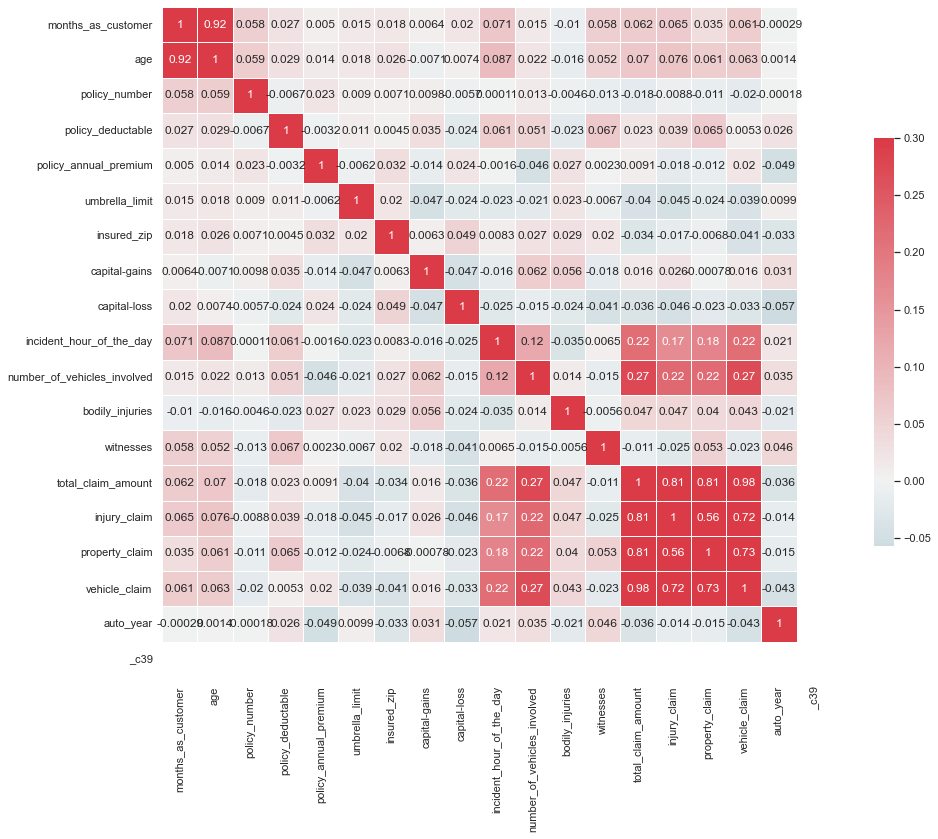

In [5]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Plot the to check Data is balanced data :

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

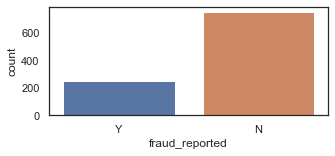

In [6]:
f, ax = plt.subplots(figsize=(5, 2))
sns.countplot(x='fraud_reported',data=data)

### Separate the target variable from the feature variables

In [7]:
X = data.drop('fraud_reported', axis=1)
y = data['fraud_reported']

### Preprocess the data

##### SimpleImputer :

The SimpleImputer class works by creating an instance of the class and specifying the strategy to use for imputing the missing values. The most commonly used strategies are "mean", "median", "most_frequent", and "constant".

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X[['policy_state', 'policy_deductable', 'policy_annual_premium']] = imputer.fit_transform(X[['policy_state', 'policy_deductable', 'policy_annual_premium']])
X['insured_sex'].fillna(value='missing', inplace=True)

### Split the data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define the preprocessing steps for numeric and categorical features

###### Pipeline

A pipeline helps to automate the entire process of building a machine learning model, making it more efficient and less prone to errors. It also enables you to experiment with different combinations of data preprocessing techniques and machine learning algorithms to optimize the performance of your model.

##### StandardScaler

The standard scaler is used to standardize the features of the data to ensure that the features are on the same scale, which helps to improve the performance of the machine learning model

In [10]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

###### OneHotEncoder

The OneHotEncoder works by taking a categorical feature column and encoding it into multiple binary columns, where each column represents a unique category. For example, if a categorical feature column has three possible values (red, green, blue), the OneHotEncoder will create three new columns, each representing one of the possible categories. The value of the new column will be 1 if the original data belongs to that category and 0 otherwise

In [11]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


### Combine the preprocessing steps into a preprocessor using ColumnTransformer


ColumnTransformer object called preprocessor that applies StandardScaler to the numerical features and OneHotEncoder to the categorical features. We then combine the preprocessor with a logistic regression classifier in a Pipeline object called model. We can then train and evaluate the model using the fit() and predict() methods, respectively.

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 
                                      'policy_annual_premium', 'umbrella_limit', 'insured_zip',
                                      'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                                      'number_of_vehicles_involved', 'total_claim_amount', 'injury_claim', 
                                      'property_claim', 'vehicle_claim', 'auto_year']),
        ('cat', categorical_transformer, ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
                                           'insured_education_level', 'insured_occupation', 'insured_hobbies',
                                           'insured_relationship', 'incident_date', 'incident_type', 
                                           'collision_type', 'incident_severity', 'authorities_contacted', 
                                           'incident_state', 'incident_city', 'incident_location',
                                           'property_damage', 'bodily_injuries', 'witnesses', 
                                           'police_report_available', 'auto_make', 'auto_model'])])


### Define the pipeline by combining the preprocessor and the decision tree classifier

The decision tree is constructed by recursively splitting the data into smaller subsets based on the value of the selected feature or attribute until the subsets are pure, or the stopping criterion is met. The stopping criterion could be the maximum depth of the tree, the minimum number of samples required to split an internal node, or the minimum number of samples required to be in a leaf node

In [13]:
pipeDTC = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifierDCT', DecisionTreeClassifier())])

## Fit the pipeline on the training set

In [14]:
pipeDTC.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_number',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'insured_zip',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                  


### Make predictions on the testing set

In [15]:
y_pred_DTC = pipeDTC.predict(X_test)

### Evaluate the model using confusion matrix, accuracy score, and classification report

In [16]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_DTC))
asDTC = accuracy_score(y_test, y_pred_DTC)
print('Accuracy Score:', asDTC)
print('Classification Report:')
crDTC = classification_report(y_test, y_pred_DTC)
print(crDTC)

Confusion Matrix:
[[132  13]
 [ 30  25]]
Accuracy Score: 0.785
Classification Report:
              precision    recall  f1-score   support

           N       0.81      0.91      0.86       145
           Y       0.66      0.45      0.54        55

    accuracy                           0.79       200
   macro avg       0.74      0.68      0.70       200
weighted avg       0.77      0.79      0.77       200



### Make a prediction for a new person


In [17]:
new_person = pd.DataFrame({'months_as_customer': [12], 'age': [30], 'policy_number': [1000], 'policy_bind_date': ['2021-01-01'],
                           'policy_state': ['NY'], 'policy_csl': ['100/300'], 'policy_deductable': [500],
                           'policy_annual_premium': [1000], 'umbrella_limit': [500000], 'insured_zip': [12345], 
                           'insured_sex': ['M'], 'insured_education_level': ['Bachelor'], 'insured_occupation': ['Manager'],
                           'insured_hobbies': ['Golf'], 'insured_relationship': ['Husband'], 'capital-gains': [0],
                           'capital-loss': [0], 'incident_date': ['2022-01-01'], 'incident_type': ['Single Vehicle Collision'], 
                           'collision_type': ['Front Collision'], 'incident_severity': ['Minor Damage'], 'authorities_contacted': ['Police'],
                           'incident_state': ['NY'], 'incident_city': ['Albany'], 'incident_location': ['Address 123'], 
                           'incident_hour_of_the_day': [10],'number_of_vehicles_involved': [1], 'property_damage': ['NO'],
                           'bodily_injuries': [1], 'witnesses': [2],'police_report_available': ['YES'],
                           'total_claim_amount': [5000], 'injury_claim': [1000],'property_claim': [3000],
                           'vehicle_claim': [1000], 'auto_make': ['Toyota'], 'auto_model': ['Corolla'],'auto_year': [2021]})


In [18]:
prediction = pipeDTC.predict(new_person)
print(prediction)

['N']


In [19]:
if prediction == 1:
    print('Yes, you can give insurance to the person.')
else:
    print('No, you cannot give insurance to the person.')


No, you cannot give insurance to the person.


# LogisticRegression

Logistic regression is a popular classification algorithm used in machine learning for solving binary and multiclass classification problems. It works by estimating the probability that an input belongs to one of the classes and then classifying it based on the highest probability.

In logistic regression, the input features are combined linearly using weights or coefficients to predict the output. These weights are then optimized using a loss function and gradient descent algorithm to minimize the difference between the predicted outputs and the actual outputs.

Logistic regression assumes a linear relationship between the input features and the log-odds of the output classes. It also assumes that the input features are independent of each other and that the errors are normally distributed.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
pipeLR = Pipeline(steps=[('preprocessor', preprocessor),
                      ('RegressionLR', LogisticRegression(random_state=0))])

In [22]:
pipeLR.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_number',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'insured_zip',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                  

In [23]:
y_pred_LR = pipeLR.predict(X_test)

In [24]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_LR))
asLR = accuracy_score(y_test, y_pred_LR)
print('Accuracy Score:',asLR)
print('Classification Report:')
crLR = classification_report(y_test, y_pred_LR)
print(crLR)

Confusion Matrix:
[[128  17]
 [ 37  18]]
Accuracy Score: 0.73
Classification Report:
              precision    recall  f1-score   support

           N       0.78      0.88      0.83       145
           Y       0.51      0.33      0.40        55

    accuracy                           0.73       200
   macro avg       0.65      0.61      0.61       200
weighted avg       0.70      0.73      0.71       200



## K - Nearest Neighbor Classifier

KNeighborsClassifier is a classification algorithm in machine learning that belongs to the family of instance-based, lazy learning algorithms. It is used for both classification and regression problems. In K-Nearest Neighbors (KNN), the class of a data point is determined by the majority class among its K nearest neighbors. K is a user-defined hyperparameter that determines the number of neighbors to consider. KNN is a non-parametric algorithm, meaning it does not make any assumptions about the underlying distribution of the data.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
pipeKNN = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifierKNN',KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2))])

In [27]:
pipeKNN.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_number',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'insured_zip',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                  

In [28]:
y_pred_KNN = pipeKNN.predict(X_test)

In [29]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_KNN))
asKNN = accuracy_score(y_test, y_pred_KNN)
print('Accuracy Score:', asKNN)
print('Classification Report:')
crKNN = classification_report(y_test, y_pred_KNN)
print(crKNN)

Confusion Matrix:
[[120  25]
 [ 45  10]]
Accuracy Score: 0.65
Classification Report:
              precision    recall  f1-score   support

           N       0.73      0.83      0.77       145
           Y       0.29      0.18      0.22        55

    accuracy                           0.65       200
   macro avg       0.51      0.50      0.50       200
weighted avg       0.61      0.65      0.62       200



##  LinearRegression

Linear Regression is a popular supervised learning algorithm used for solving regression problems in Machine Learning. It is a statistical method that is used to establish a linear relationship between a dependent variable (also called the target variable) and one or more independent variables (also called features or predictors).

In simple linear regression, we try to establish a linear relationship between the dependent variable and a single independent variable.

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
pipeLNR = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Regression',LinearRegression())])

In [32]:
y_train=y_train.apply(lambda x:1 if x=="Yes" else 0)
y_test=y_train.apply(lambda x:1 if x=="Yes" else 0)

In [33]:
pipeLNR.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_number',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'insured_zip',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                  

In [34]:
y_pred_prob = pipeLNR.predict(X_test)

In [35]:
# Convert probabilities to binary predictions using a threshold
threshold = 0.5
y_pred_LNR = [1 if prob >= threshold else 0 for prob in y_pred_prob]

In [36]:
y_pred_LNR = pipeLNR.predict(X_test)
y_pred_LNR = [1 if x >= 0.5 else 0 for x in y_pred_LNR]

# Match the indices of y_test and y_pred_LNR
y_test = y_test[:len(y_pred_LNR)]

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_LNR))
asLNR=accuracy_score(y_test, y_pred_LNR)
print('Accuracy Score:', asLNR)
print('Classification Report:')
crLNR = classification_report(y_test, y_pred_LNR)
print(crLNR)

Confusion Matrix:
[[200]]
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Polt :

In [37]:
classifiers = ['KNN', 'Logistic Regression', 'Linear Regression', 'Decision Tree']
scores = [asKNN, asLR, asLNR, asDTC]

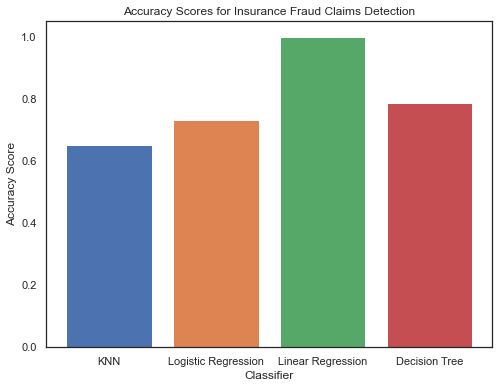

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(classifiers)):
    ax.bar(classifiers[i], scores[i])

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy Scores for Insurance Fraud Claims Detection')
plt.show()